# News Article Classification : Multiclass Classification

- 2개 이상의 클래스로 분류
- 뉴스를 46개의 상호 배타적 토픽으로 분류
- single-label, multiclass classifiaction

In [2]:
import numpy as np
from keras.datasets import reuters
# IMDB 리뷰 예제처럼 각 샘플은 단어 인덱스로 정수 리스트
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [4]:
print('train shape : ', train_data.shape)
print('test shape : ', test_data.shape)

train shape :  (8982,)
test shape :  (2246,)


In [9]:
print('train data example \n',train_data[0])
print('test data example \n',test_data[0])

train data example 
 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
test data example 
 [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5,

In [11]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

# prepare dataset

In [15]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('train shape : ', x_train.shape)
print('test shape : ', x_test.shape)

train shape :  (8982, 10000)
test shape :  (2246, 10000)


In [17]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_lables = to_categorical(test_labels)

print('train labels shape : ', one_hot_train_labels.shape)
print('test labels shape : ', one_hot_test_lables.shape)

train labels shape :  (8982, 46)
test labels shape :  (2246, 46)


# modeling
- IMDB 예제와 비슷하지만, 분률할 클래스가 46개로 증가
- 한 층이 분류 문제에 필요한 일부 정보를 누락하면, 그 다음 층에서 이를 복원할 방법이 없다.
- 잠재적으로 information bottleneck(정보의 병목) 이 될 수 있다.
- 기존에 16개의 노드 사용에서 64개로 늘려보자.

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) #마지막 Dense 층의 크기를 46으로 함으로써, 46차원의 벡터를 출력
                                                    #각각의 클래스에 속할 확률을 리턴.(합하면 1)


In [22]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
#split train data partial train ,val
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 268us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 

In [28]:
import matplotlib.pyplot as plt

In [30]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])

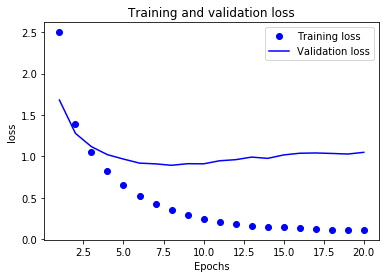

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 , len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

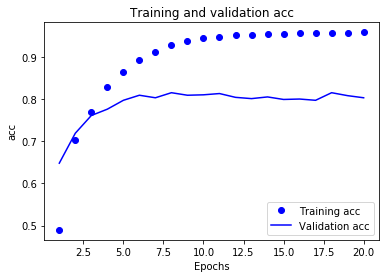

In [32]:
plt.clf() #clear

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

In [36]:
np.argmin(history.history['val_loss'])

7

In [35]:
np.argmax(history.history['val_acc'])

17

# modeling again
- avoid overfitting
- control epochs

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, patial_y_train, epochs = 9,
         batch_size= 512, validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_lables)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 79us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 0s 60us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 0s 60us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 0s 60us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 0s 60us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 0s 60us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 0s 60us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
7982

In [38]:
#accuracy 78%
results

[1.0227516769619787, 0.7756010686194165]

In [41]:
pred = model.predict(x_test)
pred[0].shape

(46,)

In [42]:
sum(pred[0])

0.9999999314903221

In [45]:
#정수 그대로 사용하고 싶다면, loss = 'sparse_categorical_crossentropoy'로만 바꿔주면 됨 
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

# bottleneck
- 46차원보다 훨씬 작은 중간층을 둠으로써, 정보의 병목이 어떻게 나타나는지 확인

In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs = 20,
         batch_size = 128, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 75us/step - loss: 3.0776 - acc: 0.2219 - val_loss: 2.3144 - val_acc: 0.4380
Epoch 2/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.7970 - acc: 0.5730 - val_loss: 1.6167 - val_acc: 0.6320
Epoch 3/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.3406 - acc: 0.6684 - val_loss: 1.4358 - val_acc: 0.6680
Epoch 4/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.1437 - acc: 0.7221 - val_loss: 1.3757 - val_acc: 0.6950
Epoch 5/20
7982/7982 [==============================] - 0s 51us/step - loss: 1.0166 - acc: 0.7516 - val_loss: 1.3410 - val_acc: 0.6960
Epoch 6/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.9196 - acc: 0.7685 - val_loss: 1.3366 - val_acc: 0.7040
Epoch 7/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.8433 - acc: 0.7798 - val_loss: 1.3553 - val_acc: 0.7060
Epoch 8

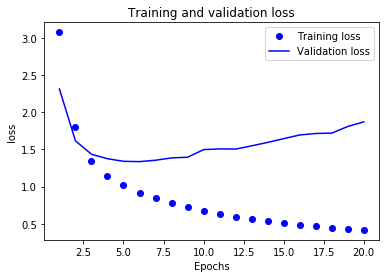

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 , len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

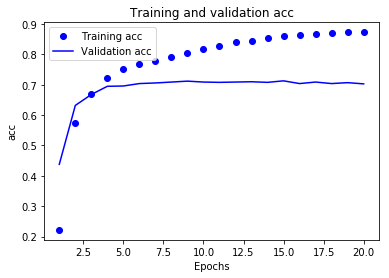

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1 , len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

중간층이 없었던 상황에 비해 확실히 낮은 0.7에서 정확도가 유지되는 것을 알 수 있다.